<a href="https://colab.research.google.com/github/vivekpatidar1413/ML_bootcamp_vivek/blob/logistic-regression/FINAL_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The MNIST dataset


In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [110]:
train_df = pd.read_csv("/content/sample_data/mnist_train_small.csv")
test_df  = pd.read_csv("/content/sample_data/mnist_test.csv")

converting the data frame into numpy array

In [111]:
train = train_df.to_numpy()
test  = test_df.to_numpy()

In [112]:
print(train.shape)
print(train)

(19999, 785)
[[5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]


# Reshaping the dataset into desired shape and Size

In [113]:
x_train = train[:,1:]
y_train = train[:,:1]

In [115]:
# Adding one more coloumn to x_train so we can take dot product of it with THEETA

x_n_train = np.arange(19999*785)
x_n_train = np.reshape(x_n_train,(19999,785))

for i in range(19999):
  x_n_train[i] = np.insert(x_train[i],0,1)
x_n_train = x_n_train/255

In [116]:
print(y_train.shape)
print(x_n_train.shape)

(19999, 1)
(19999, 785)


# THE MAIN FUNCTION

In [117]:
''' ONE VS ALL'''
# classifier

' ONE VS ALL'

Defining a function which we call for diffrent digit classification

*   input = taking the digit for which the classification is to be performed
*   output = the values of theeta and cost function after every iteration



In [118]:
def THE_MAIN_FUNCTION(n,X,Y):

  # Let the iterations be 50000
  itrations = 50000
  # let the learning rate be 0.16
  alpha = 0.16
  # the number of training set be m which is 19999 here
  m = 19999

  '''Converting the Y_TRAIN in BINARY FORM'''
  '''Y be 1 if the number is same as the digit to be trained(n)'''
  '''Y be 0 if the number is not equal as the digit to be trained(n)'''
  for i in range(19999):
    if Y[i]==n:
      Y[i]=1
    else:
      Y[i]=0

  y = Y.T
  X = X.T
  
  # Intialising the array of theeta to be any random value 
  Theeta = np.random.randn(1,785)

  Cost_Function = []
  k = 0

  print('TRAINING THE MODEL FOR DIGIT',n)


  # The main itration loops bigins from here

  for i in range(1,itrations+1):
    
    g = np.dot(Theeta,X)
    hypothesis = 1/(1 + np.exp(-g))

    # COST FUNCTION
    j = 1/m*(-1*(np.sum(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))))
    Cost_Function.append(j)
    
    # GRADIENT DESCENT
    dw =  1/m * np.dot(hypothesis-y,X.T)
    Theeta = Theeta - alpha*dw
    
    k+=1

    if i%2500 == 0:
      print(i,'th Iteration , Cost Function =',j)


    # BREAKING THE LOOP
    '''stoping the loop if the change in value of cost function is too low'''
    if i%2 == 0:
      if abs(j-Cost_Function[-2])<0.000001:
        if abs(j-Cost_Function[-3])<0.000001:
          break 

      
  print('Last itteration number:',k)

  return Theeta,Cost_Function

In [27]:
y_train

array([[5],
       [7],
       [9],
       ...,
       [2],
       [9],
       [5]])

In [11]:
Theeta0 , Cost_Function0 = THE_MAIN_FUNCTION (0,x_n_train,y_train)
Theeta1 , Cost_Function1 = THE_MAIN_FUNCTION (1,x_n_train,y_train)

TRAINING THE MODEL FOR DIGIT 0
2500 th Iteration , Cost Function = 0.06041040573278516
5000 th Iteration , Cost Function = 0.04906703014962782
7500 th Iteration , Cost Function = 0.04334372045004448
10000 th Iteration , Cost Function = 0.03961669775569828
12500 th Iteration , Cost Function = 0.03692579793340377
15000 th Iteration , Cost Function = 0.03486363878296964
17500 th Iteration , Cost Function = 0.033216712547757654
Last itteration number: 19868
TRAINING THE MODEL FOR DIGIT 1
2500 th Iteration , Cost Function = 0.057798215191868806
5000 th Iteration , Cost Function = 0.04604344257275115
7500 th Iteration , Cost Function = 0.040567038639967384
10000 th Iteration , Cost Function = 0.03704956712927097
12500 th Iteration , Cost Function = 0.034518325236555285
15000 th Iteration , Cost Function = 0.03259073449346777
17500 th Iteration , Cost Function = 0.03106556631225347
Last itteration number: 18644


In [40]:
Theeta2 , Cost_Function2 = THE_MAIN_FUNCTION (2,x_n_train,y_train)

TRAINING THE MODEL FOR DIGIT 2
2500 th Iteration , Cost Function = 0.11931921583769352
5000 th Iteration , Cost Function = 0.0992087175142309
7500 th Iteration , Cost Function = 0.0896869124863076
10000 th Iteration , Cost Function = 0.08381462155248537
12500 th Iteration , Cost Function = 0.07981203397749509
15000 th Iteration , Cost Function = 0.07689319034301668
17500 th Iteration , Cost Function = 0.07465387600664779
20000 th Iteration , Cost Function = 0.07286869792335404
22500 th Iteration , Cost Function = 0.07140309191857962
Last itteration number: 23494


In [52]:
Theeta3 , Cost_Function3 = THE_MAIN_FUNCTION (3,x_n_train,y_train)

TRAINING THE MODEL FOR DIGIT 3
2500 th Iteration , Cost Function = 0.13563987952445228
5000 th Iteration , Cost Function = 0.11326294321733435
7500 th Iteration , Cost Function = 0.10369498460352018
10000 th Iteration , Cost Function = 0.0982525261152735
12500 th Iteration , Cost Function = 0.0946418881512357
15000 th Iteration , Cost Function = 0.09202214704496718
17500 th Iteration , Cost Function = 0.09001092973888837
20000 th Iteration , Cost Function = 0.08840623843657527
Last itteration number: 21932


In [64]:
Theeta4 , Cost_Function4 = THE_MAIN_FUNCTION (4,x_n_train,y_train)

TRAINING THE MODEL FOR DIGIT 4
2500 th Iteration , Cost Function = 0.09369559173311176
5000 th Iteration , Cost Function = 0.07839983681276079
7500 th Iteration , Cost Function = 0.07069005748541593
10000 th Iteration , Cost Function = 0.06579064446646775
12500 th Iteration , Cost Function = 0.06235889497377829
15000 th Iteration , Cost Function = 0.05979265899653366
17500 th Iteration , Cost Function = 0.05777933742662985
20000 th Iteration , Cost Function = 0.0561437349616969
22500 th Iteration , Cost Function = 0.054780942004905187
Last itteration number: 22514


In [75]:
Theeta5 , Cost_Function5 = THE_MAIN_FUNCTION (5,x_n_train,y_train)

TRAINING THE MODEL FOR DIGIT 5
2500 th Iteration , Cost Function = 0.14014545445448723
5000 th Iteration , Cost Function = 0.11585745188799228
7500 th Iteration , Cost Function = 0.10446644668829982
10000 th Iteration , Cost Function = 0.09774459603162665
12500 th Iteration , Cost Function = 0.09325878474237423
15000 th Iteration , Cost Function = 0.09001798386785721
17500 th Iteration , Cost Function = 0.08754393890989463
20000 th Iteration , Cost Function = 0.08557763313809627
22500 th Iteration , Cost Function = 0.08396687161114089
Last itteration number: 24918


In [86]:
Theeta6 , Cost_Function6 = THE_MAIN_FUNCTION (6,x_n_train,y_train)

TRAINING THE MODEL FOR DIGIT 6
2500 th Iteration , Cost Function = 0.0741880252988771
5000 th Iteration , Cost Function = 0.0631830742142477
7500 th Iteration , Cost Function = 0.05721118582331882
10000 th Iteration , Cost Function = 0.05314238468015187
12500 th Iteration , Cost Function = 0.05013624184749069
15000 th Iteration , Cost Function = 0.047809392369757585
17500 th Iteration , Cost Function = 0.04595018886892197
20000 th Iteration , Cost Function = 0.044428419573251735
Last itteration number: 21456


In [97]:
Theeta7 , Cost_Function7 = THE_MAIN_FUNCTION (7,x_n_train,y_train)

TRAINING THE MODEL FOR DIGIT 7
2500 th Iteration , Cost Function = 0.07930303222290891
5000 th Iteration , Cost Function = 0.06641028884497935
7500 th Iteration , Cost Function = 0.06064199643542249
10000 th Iteration , Cost Function = 0.05705538981758584
12500 th Iteration , Cost Function = 0.05453111427980209
15000 th Iteration , Cost Function = 0.0526372608708086
17500 th Iteration , Cost Function = 0.05115362212772595
Last itteration number: 18228


In [108]:
Theeta8 , Cost_Function8 = THE_MAIN_FUNCTION (8,x_n_train,y_train)

TRAINING THE MODEL FOR DIGIT 8
2500 th Iteration , Cost Function = 0.2036883546879894
5000 th Iteration , Cost Function = 0.17645506540909262
7500 th Iteration , Cost Function = 0.16506922369701954
10000 th Iteration , Cost Function = 0.15848603286749735
12500 th Iteration , Cost Function = 0.15421689969572153
15000 th Iteration , Cost Function = 0.15125635470607918
17500 th Iteration , Cost Function = 0.14909672983687638
20000 th Iteration , Cost Function = 0.14745489878577617
Last itteration number: 21584


In [119]:
Theeta9 , Cost_Function9 = THE_MAIN_FUNCTION (9,x_n_train,y_train)

TRAINING THE MODEL FOR DIGIT 9
2500 th Iteration , Cost Function = 0.16500943623869507
5000 th Iteration , Cost Function = 0.14141752756850529
7500 th Iteration , Cost Function = 0.13058051904279028
10000 th Iteration , Cost Function = 0.12409200352512417
12500 th Iteration , Cost Function = 0.11969857147976186
15000 th Iteration , Cost Function = 0.11652089048077316
17500 th Iteration , Cost Function = 0.11412162917690935
20000 th Iteration , Cost Function = 0.11225052002200168
22500 th Iteration , Cost Function = 0.1107527723782374
Last itteration number: 23460


# Graph Ploting for Cost Function

Graph Showing the decresing nature of cost function 

*   number of iterations on x-axis
*   cost function value on y-axis





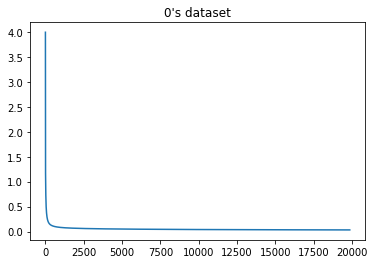

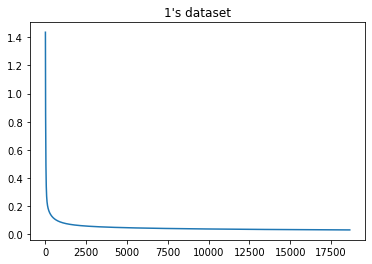

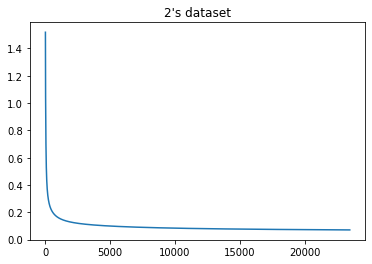

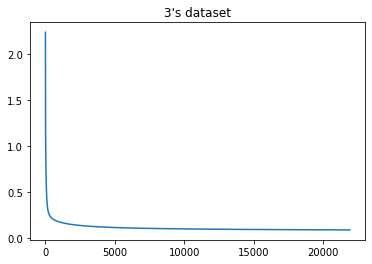

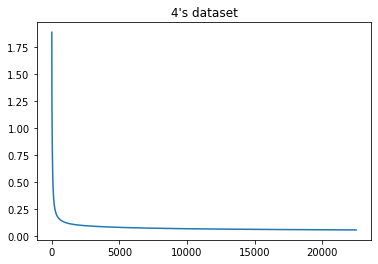

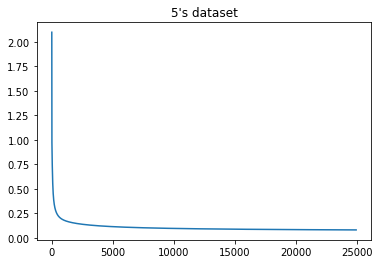

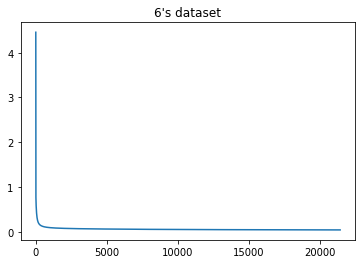

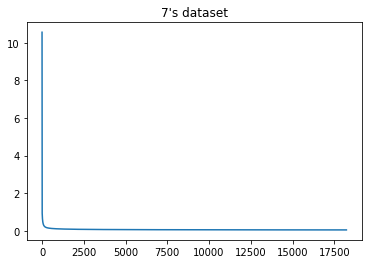

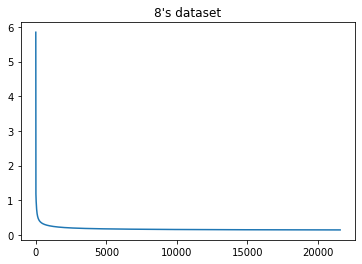

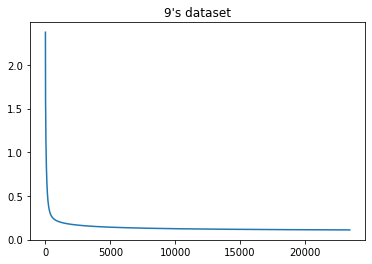

In [120]:
plt.plot(Cost_Function0)
plt.title("0's dataset")
plt.show()
plt.plot(Cost_Function1)
plt.title("1's dataset")
plt.show()
plt.plot(Cost_Function2)
plt.title("2's dataset")
plt.show()
plt.plot(Cost_Function3)
plt.title("3's dataset")
plt.show()
plt.plot(Cost_Function4)
plt.title("4's dataset")
plt.show()
plt.plot(Cost_Function5)
plt.title("5's dataset")
plt.show()
plt.plot(Cost_Function6)
plt.title("6's dataset")
plt.show()
plt.plot(Cost_Function7)
plt.title("7's dataset")
plt.show()
plt.plot(Cost_Function8)
plt.title("8's dataset")
plt.show()
plt.plot(Cost_Function9)
plt.title("9's dataset")
plt.show()

# Accuracy Finding

Running test in each row (each traing examples)


In [123]:
Theeta = [Theeta0,Theeta1,Theeta2,Theeta3,Theeta4,Theeta5,Theeta6,Theeta7,Theeta8,Theeta9]

In [126]:
x_test = test[:,1:]
y_test = test[:,:1]

In [127]:
# Adding one more coloumn to x_test so we can take dot product of it with THEETA

x_n_test = np.arange(9999*785)
x_n_test = np.reshape(x_n_test,(9999,785))

for i in range(9999):
  x_n_test[i] = np.insert(x_test[i],0,1)
x_n_test = x_n_test/255

In [139]:
accurates =[]

for i in range(10):
  correct = 0
  y = y_test
  for j in range(9999):

    if y_test[j]==i:
      y[j]=1
    else:
      y[j]=0

  # finding the hypothesis by taking the Theeta
  # And cheacking that if the model can determine its correcct value or not
  
    g_temp = np.dot(Theeta[i],x_n_test[j])
    hypothesis = 1/(1+np.exp(-g_temp))

    if hypothesis>=0.5:
      hypothesis = 1
    else:
      hypothesis = 0
    
    if hypothesis == y_test[j] :
      correct+=1

  accurates.append(correct)

  print(correct/9999*100,' is accuracy for digit',i)

10.071007100710071  is accuracy for digit 0
10.05100510051005  is accuracy for digit 1
90.67906790679068  is accuracy for digit 2
90.3990399039904  is accuracy for digit 3
90.46904690469046  is accuracy for digit 4
92.04920492049204  is accuracy for digit 5
90.2890289028903  is accuracy for digit 6
89.97899789978999  is accuracy for digit 7
91.06910691069106  is accuracy for digit 8
90.22902290229023  is accuracy for digit 9


In [145]:
# Just finding the percentage of accuracy of the model
t = 0
for i in range(2,10):
  t+=accurates[i]


print("\n\n\n\n\n\n\n\nTHE ACCURACY OF MY THIS LOGISTIC REGRESSION MODEL IS :")
print(t/9999*100/8)









THE ACCURACY OF MY THIS LOGISTIC REGRESSION MODEL IS :
90.64531453145315
